In [ ]:
!pip install cur

In [ ]:
import pandas as pd
import numpy as np

# Load the full dataset without setting an index
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')

# Drop specified columns
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)

# Replace '-' with '0' in the 'Levy' column
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0')
# Convert 'Levy' to an integer
car_prices_df['Levy'] = car_prices_df['Levy'].astype(int)

# Remove ' km' suffix from 'Mileage' and convert to integer
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

# Convert the DataFrame to a NumPy array (excluding the header)
data_array = car_prices_df.to_numpy()

# Use the column names from the modified DataFrame
new_column_names = car_prices_df.columns

# Create a new DataFrame from the modified array
new_car_prices_df = pd.DataFrame(data_array, columns=new_column_names)

# Display the first 5 rows of the new DataFrame to verify
new_car_prices_df[0:5]

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'new_car_prices_df' is your DataFrame loaded correctly
df = new_car_prices_df  # Using the DataFrame from your last manipulation

# Identify categorical columns - Example columns might include 'Color', 'Gear box type'
categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column after filling missing values with 'Missing'
for column in categorical_columns:
    df[column] = df[column].fillna('Missing')  # Fill missing values
    df[column] = label_encoder.fit_transform(df[column])

# After encoding, check for any NaN values across the DataFrame and replace them with zero
df.fillna(0, inplace=True)

# Optionally, ensure all numeric columns are of a numeric type (int or float)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.fillna(0, inplace=True)  # Replace any remaining NaNs that resulted from coercion errors with zero

# Display the first 5 rows of the DataFrame to verify the changes
print(df.head())

   Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0  1399            32   1242        2010         4                 1   
1  1018             8    658        2011         4                 0   
2     0            21    684        2006         3                 0   
3   862            16    661        2011         4                 1   
4   446            21    684        2014         3                 1   

   Fuel type  Engine volume  Mileage  Cylinders  Gear box type  Drive wheels  \
0          2            3.5   186005        6.0              0             0   
1          5            3.0   192000        6.0              2             0   
2          5            1.3   200000        4.0              3             1   
3          2            2.5   168966        4.0              0             0   
4          5            1.3    91901        4.0              0             1   

   Wheel  Color  Airbags  
0      0     12       12  
1      0      1        8  
2    

In [ ]:
import numpy as np
import pandas as pd

# Assuming `df` is your preprocessed DataFrame ready for CUR application

def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()

    # Step 2: Randomly select k columns and rows based on their probabilities
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)

    # Step 3: Construct matrices C, U, and R
    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R

# Convert DataFrame to numpy array for processing
data_matrix = df.to_numpy()

# Apply CUR decomposition
num_features = 10  # For example, let's reduce to 10 features
C, U, R = cur_decomposition(data_matrix, num_features)

# You can use the matrix C (and R) directly as the reduced feature set
# If you want to revert back to a DataFrame for further analysis or use in ML models:
reduced_df = pd.DataFrame(C, columns=[f"Feature_{i}" for i in range(C.shape[1])])

reduced_df[0:5]

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
0,186005.0,2010.0,1399.0,1242.0,32.0,12.0,12.0,4.0,6.0,2.0
1,192000.0,2011.0,1018.0,658.0,8.0,1.0,8.0,4.0,6.0,5.0
2,200000.0,2006.0,0.0,684.0,21.0,1.0,2.0,3.0,4.0,5.0
3,168966.0,2011.0,862.0,661.0,16.0,14.0,0.0,4.0,4.0,2.0
4,91901.0,2014.0,446.0,684.0,21.0,12.0,4.0,3.0,4.0,5.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

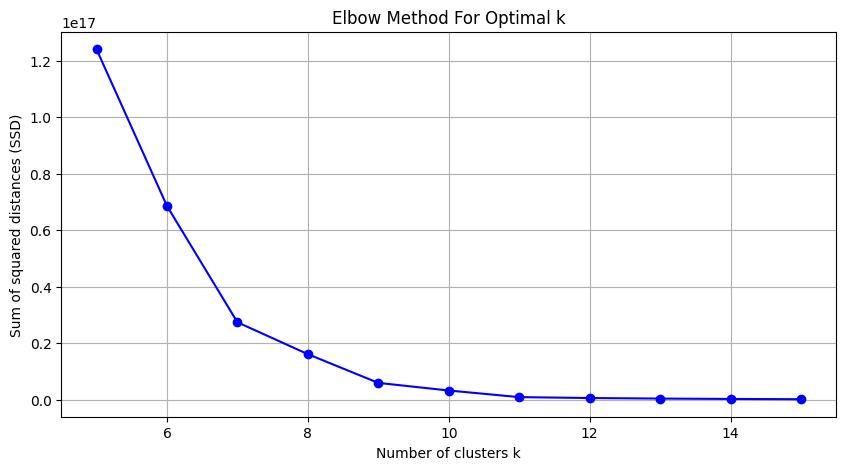

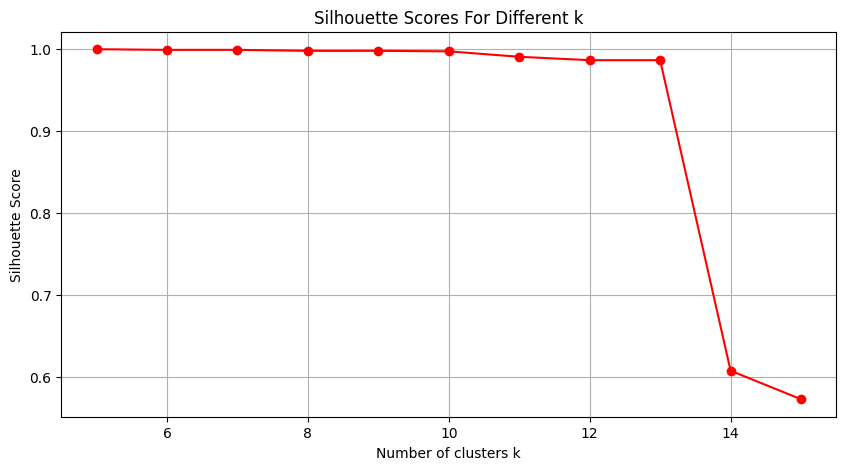

Silhouette Score for k=5: 0.9996
Silhouette Score for k=6: 0.9988
Silhouette Score for k=7: 0.9988
Silhouette Score for k=8: 0.9976
Silhouette Score for k=9: 0.9976
Silhouette Score for k=10: 0.9970
Silhouette Score for k=11: 0.9904
Silhouette Score for k=12: 0.9862
Silhouette Score for k=13: 0.9862
Silhouette Score for k=14: 0.6080
Silhouette Score for k=15: 0.5733


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame fully prepared for clustering
df = new_car_prices_df  # Let's assume this DataFrame is ready and preprocessed

# Variables to store results
ssd = []  # Sum of squared distances
silhouette_scores = []

# Range of k to try
k_range = range(5, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

    # Compute the silhouette score, only if there are more than 1 cluster (silhouette score requires more than one cluster)
    if k > 1:
        sil_score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None)

# Plotting the Elbow Method graph for SSD
plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()

# Displaying the silhouette scores for review
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")

**Perform CUR dimensionality reduction to 2 columns**

In [ ]:
import numpy as np
import pandas as pd

# Assuming `df` is your preprocessed DataFrame ready for CUR application

def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()

    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)
    #  Construct matrices C, U, and R
    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R
data_matrix = df.to_numpy()
num_features = 2
C, U, R = cur_decomposition(data_matrix, num_features)
reduced_df = pd.DataFrame(C, columns=[f"Feature_{i}" for i in range(C.shape[1])])
print("\nSelected original columns:")
print(original_columns)
reduced_df[0:5]


Selected original columns:
Index(['Mileage', 'Prod. year'], dtype='object')


,Feature_0,Feature_1
0,186005.0,2010.0
1,192000.0,2011.0
2,200000.0,2006.0
3,168966.0,2011.0
4,91901.0,2014.0


In [ ]:
print(reduced_df.head())

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   186005.0     2010.0     1242.0     1399.0       32.0       12.0   
1   192000.0     2011.0      658.0     1018.0        8.0        1.0   
2   200000.0     2006.0      684.0        0.0       21.0        1.0   
3   168966.0     2011.0      661.0      862.0       16.0       14.0   
4    91901.0     2014.0      684.0      446.0       21.0       12.0   

   Feature_6  Feature_7  Feature_8  Feature_9  
0        6.0        0.0       12.0        2.0  
1        6.0        0.0        8.0        5.0  
2        4.0        1.0        2.0        5.0  
3        4.0        0.0        0.0        2.0  
4        4.0        1.0        4.0        5.0  


In [ ]:
import numpy as np
import pandas as pd

def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    col_probs = col_squared_norms / col_squared_norms.sum()

    # Step 2: Randomly select k columns based on their probabilities
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)

    # Step 3: Construct matrix C (we only need C for dimensionality reduction)
    C = A[:, cols]

    return C, cols

# Convert DataFrame to numpy array for processing
data_matrix = df.to_numpy()

# Apply CUR decomposition to reduce to 2 columns
num_features = 2
C, selected_cols = cur_decomposition(data_matrix, num_features)

# Create a new DataFrame with the reduced features
reduced_df = pd.DataFrame(C, columns=[f"CUR_Feature_{i}" for i in range(C.shape[1])])

# Display the first 5 rows of the reduced DataFrame
print(reduced_df.head())

# Display which original columns were selected
original_columns = df.columns[selected_cols]
print("\nSelected original columns:")
print(original_columns)

   CUR_Feature_0  CUR_Feature_1
0       186005.0         2010.0
1       192000.0         2011.0
2       200000.0         2006.0
3       168966.0         2011.0
4        91901.0         2014.0

Selected original columns:
Index(['Mileage', 'Prod. year'], dtype='object')


**3.2 Perform SVD dimensionality reduction to 2 columns. Show colab cell code and results.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Assuming df is your preprocessed DataFrame
# First, let's standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform SVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_data = svd.fit_transform(scaled_data)

# Create a new DataFrame with the reduced features
reduced_df = pd.DataFrame(reduced_data, columns=['SVD_1', 'SVD_2'])

# Display the first 5 rows of the reduced DataFrame
print(reduced_df.head())

# Print the explained variance ratio
print("\nExplained Variance Ratio:")
print(svd.explained_variance_ratio_)
print(f"Total Explained Variance: {sum(svd.explained_variance_ratio_):.4f}")

# Optionally, you can see which original features contribute most to each component
feature_importance = pd.DataFrame({
    'feature': df.columns,
    'SVD_1': svd.components_[0],
    'SVD_2': svd.components_[1]
})

print("\nFeature Importance:")
print(feature_importance.sort_values('SVD_1', key=abs, ascending=False).head(10))

      SVD_1     SVD_2
0  2.429228  1.454533
1  0.544996  2.434806
2 -3.749792  2.268424
3  0.608613 -0.043702
4 -0.100955 -0.901035

Explained Variance Ratio:
[0.17268321 0.10569097]
Total Explained Variance: 0.2784

Feature Importance:
             feature     SVD_1     SVD_2
0               Levy  0.437313  0.001916
5   Leather interior  0.435519 -0.227840
7      Engine volume  0.400736  0.371462
3         Prod. year  0.327990 -0.377991
9          Cylinders  0.310445  0.494902
12             Wheel -0.283446  0.273046
10     Gear box type -0.263092  0.234878
14           Airbags  0.206391 -0.010246
11      Drive wheels -0.204772 -0.349754
1       Manufacturer -0.085403  0.136006


In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_df = svd.fit_transform(df)


reduced_df = pd.DataFrame(reduced_df, columns=['Feature_1', 'Feature_2'])


print(reduced_df.head())

       Feature_1    Feature_2
0  186005.003474  2648.604369
1  192000.003123  2310.827450
2  200000.002959  2017.750061
3  168966.003098  2266.339149
4   91901.003044  2155.900143


     Component 1  Component 2
0  186005.003474  2648.604369
1  192000.003123  2310.827450
2  200000.002959  2017.750061
3  168966.003098  2266.339149
4   91901.003044  2155.900143


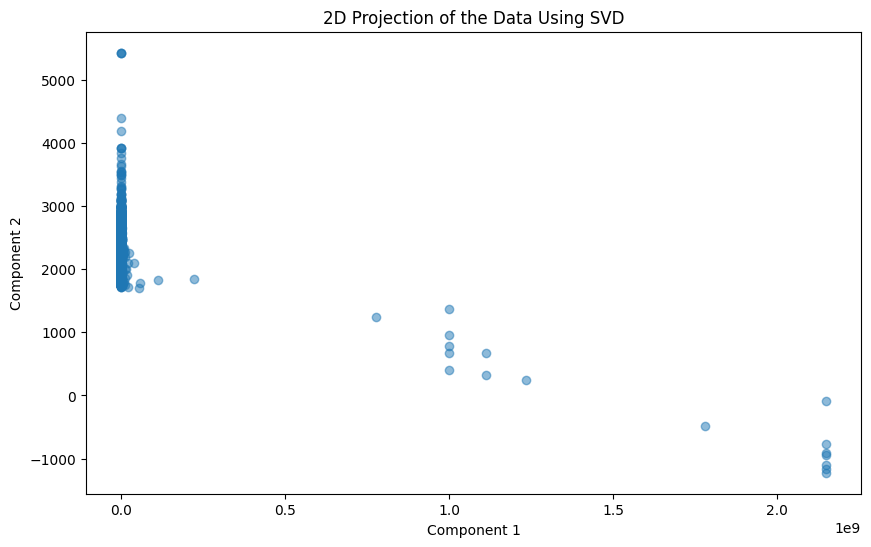

In [ ]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib scipy

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the full dataset without setting an index
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')

# Drop specified columns
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)

# Replace '-' with '0' in the 'Levy' column
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0')
# Convert 'Levy' to an integer
car_prices_df['Levy'] = car_prices_df['Levy'].astype(int)

# Remove ' km' suffix from 'Mileage' and convert to integer
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

# Use the column names from the modified DataFrame
new_column_names = car_prices_df.columns

# Create a new DataFrame from the modified array
new_car_prices_df = pd.DataFrame(car_prices_df.to_numpy(), columns=new_column_names)

# Identify categorical columns
categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column after filling missing values with 'Missing'
for column in categorical_columns:
    new_car_prices_df[column] = new_car_prices_df[column].fillna('Missing')  # Fill missing values
    new_car_prices_df[column] = label_encoder.fit_transform(new_car_prices_df[column])

# After encoding, check for any NaN values across the DataFrame and replace them with zero
new_car_prices_df.fillna(0, inplace=True)

# Optionally, ensure all numeric columns are of a numeric type (int or float)
for col in new_car_prices_df.columns:
    if new_car_prices_df[col].dtype == 'object':
        new_car_prices_df[col] = pd.to_numeric(new_car_prices_df[col], errors='coerce')
new_car_prices_df.fillna(0, inplace=True)  # Replace any remaining NaNs that resulted from coercion errors with zero

# Perform SVD dimensionality reduction to 2 columns
svd = TruncatedSVD(n_components=2, random_state=42)
svd_transformed = svd.fit_transform(new_car_prices_df)

# Convert the reduced data back to a DataFrame for better readability
reduced_df = pd.DataFrame(svd_transformed, columns=['Component 1', 'Component 2'])

# Display the first 5 rows of the reduced DataFrame to verify
print(reduced_df.head())

# Optionally, visualize the reduced dimensions
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of the Data Using SVD')
plt.show()


**3.3 Perform CUR dimensionality reduction to 5 columns. Show colab cell code and results.**

In [ ]:
import numpy as np
import pandas as pd

# Assuming `df` is your preprocessed DataFrame ready for CUR application

def cur_decomposition(A, k):
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)

    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R

data_matrix = df.to_numpy()

num_features = 5
C, U, R = cur_decomposition(data_matrix, num_features)
reduced_df = pd.DataFrame(C, columns=[f"Feature_{i}" for i in range(C.shape[1])])
original_columns = df.columns[selected_cols]
print("\nSelected original columns:")
print(original_columns)

reduced_df[0:5]


Selected original columns:
Index(['Mileage', 'Prod. year', 'Levy', 'Model', 'Manufacturer'], dtype='object')


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4
0,186005.0,2010.0,1242.0,1399.0,32.0
1,192000.0,2011.0,658.0,1018.0,8.0
2,200000.0,2006.0,684.0,0.0,21.0
3,168966.0,2011.0,661.0,862.0,16.0
4,91901.0,2014.0,684.0,446.0,21.0


In [ ]:
import numpy as np
import pandas as pd

def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    col_probs = col_squared_norms / col_squared_norms.sum()

    # Step 2: Randomly select k columns based on their probabilities
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)

    # Step 3: Construct matrix C (we only need C for dimensionality reduction)
    C = A[:, cols]

    return C, cols

# Convert DataFrame to numpy array for processing
data_matrix = df.to_numpy()

# Apply CUR decomposition to reduce to 5 columns
num_features = 5
C, selected_cols = cur_decomposition(data_matrix, num_features)

# Create a new DataFrame with the reduced features
reduced_df = pd.DataFrame(C, columns=[f"CUR_Feature_{i}" for i in range(C.shape[1])])

# Display the first 5 rows of the reduced DataFrame
print("First 5 rows of the reduced DataFrame:")
print(reduced_df.head())

# Display which original columns were selected
original_columns = df.columns[selected_cols]
print("\nSelected original columns:")
print(original_columns)

# Calculate and display the percentage of variance retained
total_variance = np.var(data_matrix, axis=0).sum()
retained_variance = np.var(C, axis=0).sum()
variance_retained = (retained_variance / total_variance) * 100

print(f"\nPercentage of variance retained: {variance_retained:.2f}%")

First 5 rows of the reduced DataFrame:
   CUR_Feature_0  CUR_Feature_1  CUR_Feature_2  CUR_Feature_3  CUR_Feature_4
0       186005.0         2010.0         1399.0         1242.0           32.0
1       192000.0         2011.0         1018.0          658.0            8.0
2       200000.0         2006.0            0.0          684.0           21.0
3       168966.0         2011.0          862.0          661.0           16.0
4        91901.0         2014.0          446.0          684.0           21.0

Selected original columns:
Index(['Mileage', 'Prod. year', 'Levy', 'Model', 'Manufacturer'], dtype='object')

Percentage of variance retained: 100.00%


**3.4 Perform SVD dimensionality reduction of SVD data to 5 columns. Show colab cell code and results.**

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Assuming 'df' is your preprocessed DataFrame ready for SVD application
svd = TruncatedSVD(n_components=5, random_state=42)
reduced_df = svd.fit_transform(df)

# Convert the reduced array back to a DataFrame
reduced_df = pd.DataFrame(reduced_df, columns=[f"Feature_{i}" for i in range(5)])

# Display the first 5 rows of the reduced DataFrame
print(reduced_df.head())

       Feature_0    Feature_1   Feature_2   Feature_3  Feature_4
0  186005.003474  2648.604369  622.186162 -371.057223  -0.986507
1  192000.003123  2310.827450  371.056902  184.834250  24.509488
2  200000.002959  2017.750061 -602.830692  237.144998  13.553177
3  168966.003098  2266.339149  221.769582  194.101088  17.015526
4   91901.003044  2155.900143 -179.776892  206.488994  12.674643


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Assuming df is your preprocessed DataFrame
# First, let's standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform SVD
svd = TruncatedSVD(n_components=5, random_state=42)
reduced_data = svd.fit_transform(scaled_data)

# Create a new DataFrame with the reduced features
reduced_df = pd.DataFrame(reduced_data, columns=[f'SVD_{i+1}' for i in range(5)])

# Display the first 5 rows of the reduced DataFrame
print("First 5 rows of the reduced DataFrame:")
print(reduced_df.head())

# Print the explained variance ratio
print("\nExplained Variance Ratio:")
print(svd.explained_variance_ratio_)
print(f"Total Explained Variance: {sum(svd.explained_variance_ratio_):.4f}")

# Calculate and display the percentage of variance retained
variance_retained = sum(svd.explained_variance_ratio_) * 100
print(f"\nPercentage of variance retained: {variance_retained:.2f}%")

# Optionally, you can see which original features contribute most to each component
feature_importance = pd.DataFrame({
    'feature': df.columns,
    'SVD_1': svd.components_[0],
    'SVD_2': svd.components_[1],
    'SVD_3': svd.components_[2],
    'SVD_4': svd.components_[3],
    'SVD_5': svd.components_[4]
})

print("\nTop 10 features contributing to SVD_1:")
print(feature_importance.sort_values('SVD_1', key=abs, ascending=False)[['feature', 'SVD_1']].head(10))

First 5 rows of the reduced DataFrame:
      SVD_1     SVD_2     SVD_3     SVD_4     SVD_5
0  2.429183  1.454621 -1.242258 -0.795075  0.502455
1  0.544935  2.435120  0.951666  0.616519 -1.206174
2 -3.749716  2.268151  0.754442  0.779971 -2.014433
3  0.608620 -0.043778 -2.000508  1.005594 -0.267075
4 -0.100936 -0.901116 -0.653296  0.656092 -1.013843

Explained Variance Ratio:
[0.17268321 0.10569098 0.10204826 0.08077612 0.07169368]
Total Explained Variance: 0.5329

Percentage of variance retained: 53.29%

Top 10 features contributing to SVD_1:
             feature     SVD_1
0               Levy  0.437310
5   Leather interior  0.435551
7      Engine volume  0.400741
3         Prod. year  0.328005
9          Cylinders  0.310447
12             Wheel -0.283431
10     Gear box type -0.263070
14           Airbags  0.206368
11      Drive wheels -0.204758
1       Manufacturer -0.085386


   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   186005.0     2010.0     1242.0     1399.0       32.0       12.0   
1   192000.0     2011.0      658.0     1018.0        8.0        1.0   
2   200000.0     2006.0      684.0        0.0       21.0        1.0   
3   168966.0     2011.0      661.0      862.0       16.0       14.0   
4    91901.0     2014.0      684.0      446.0       21.0       12.0   

   Feature_6  Feature_7  Feature_8  Feature_9  
0        6.0        0.0       12.0        2.0  
1        6.0        0.0        8.0        5.0  
2        4.0        1.0        2.0        5.0  
3        4.0        0.0        0.0        2.0  
4        4.0        1.0        4.0        5.0  
     Component_1  Component_2  Component_3  Component_4  Component_5
0  186005.003474  2648.601151   622.183113  -371.051632    -0.972806
1  192000.003123  2310.823032   371.056338   184.839441    24.534780
2  200000.002959  2017.748367  -602.830308   237.153401    13.582483
3  168966

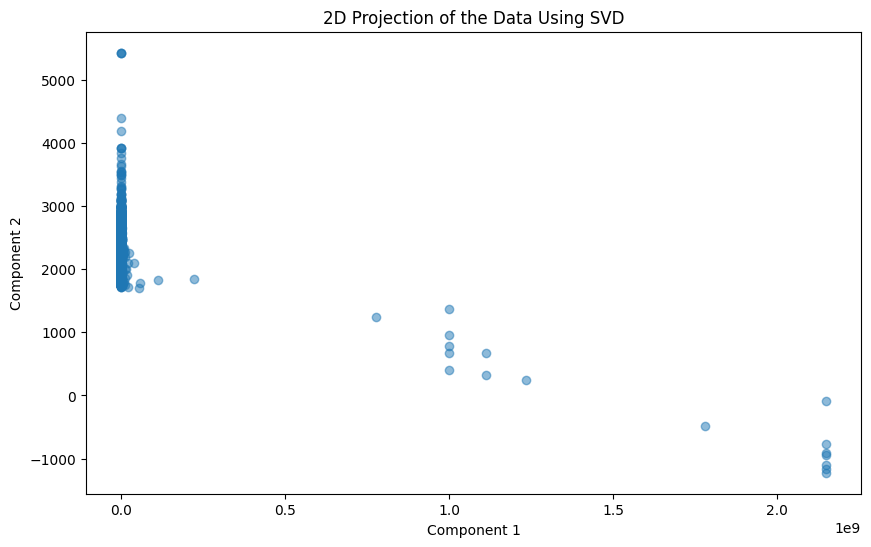

In [ ]:
# Ensure necessary libraries are installed
!pip install numpy pandas scikit-learn matplotlib

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the full dataset without setting an index
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')

# Drop specified columns
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)

# Replace '-' with '0' in the 'Levy' column
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0')
# Convert 'Levy' to an integer
car_prices_df['Levy'] = car_prices_df['Levy'].astype(int)

# Remove ' km' suffix from 'Mileage' and convert to integer
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

# Use the column names from the modified DataFrame
new_column_names = car_prices_df.columns

# Create a new DataFrame from the modified array
new_car_prices_df = pd.DataFrame(car_prices_df.to_numpy(), columns=new_column_names)

# Identify categorical columns
categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column after filling missing values with 'Missing'
for column in categorical_columns:
    new_car_prices_df[column] = new_car_prices_df[column].fillna('Missing')  # Fill missing values
    new_car_prices_df[column] = label_encoder.fit_transform(new_car_prices_df[column])

# After encoding, check for any NaN values across the DataFrame and replace them with zero
new_car_prices_df.fillna(0, inplace=True)

# Optionally, ensure all numeric columns are of a numeric type (int or float)
for col in new_car_prices_df.columns:
    if new_car_prices_df[col].dtype == 'object':
        new_car_prices_df[col] = pd.to_numeric(new_car_prices_df[col], errors='coerce')
new_car_prices_df.fillna(0, inplace=True)  # Replace any remaining NaNs that resulted from coercion errors with zero

# Convert DataFrame to numpy array for processing
data_matrix = new_car_prices_df.to_numpy()

# Apply CUR decomposition
def cur_decomposition(A, k):
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)
    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R
num_features = 10
C, U, R = cur_decomposition(data_matrix, num_features)
reduced_df = pd.DataFrame(C, columns=[f"Feature_{i}" for i in range(C.shape[1])])
print(reduced_df.head())
svd = TruncatedSVD(n_feature=5, random_state=42)
svd_transformed = svd.fit_transform(reduced_df)
print(svd_reduced_df.head())

# Optionally, visualize the first two components of the reduced dimensions
plt.figure(figsize=(10, 6))
plt.scatter(svd_reduced_df['Component_1'], svd_reduced_df['Component_2'], alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of the Data Using SVD')
plt.show()


**3.5 Perform k -means clustering on the CUR results from 3.1 for k of 3 to 10 . Show code and results. Show colab cell code and results.**

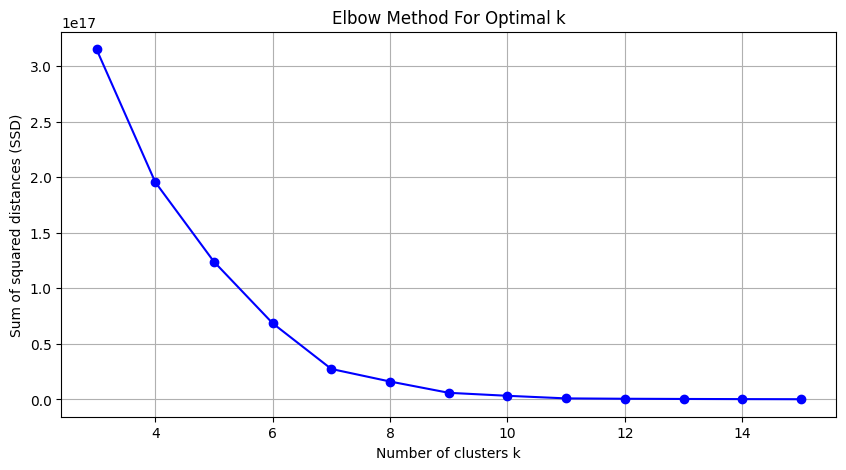

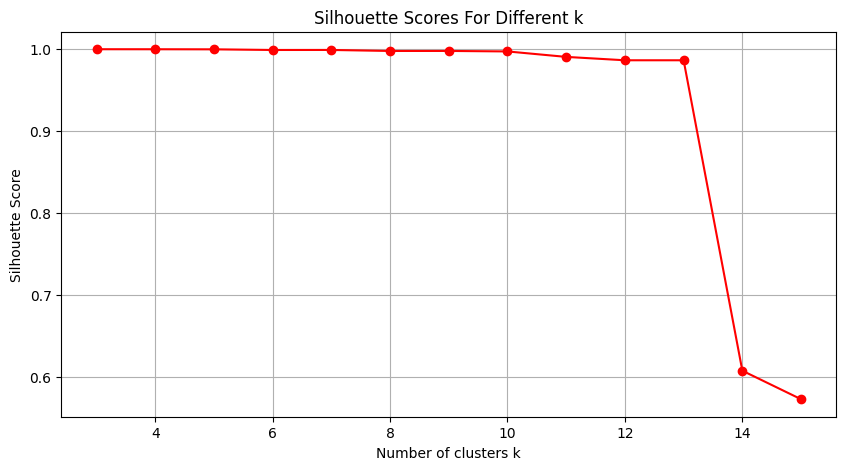

Silhouette Score for k=3: 0.9997
Silhouette Score for k=4: 0.9997
Silhouette Score for k=5: 0.9996
Silhouette Score for k=6: 0.9988
Silhouette Score for k=7: 0.9988
Silhouette Score for k=8: 0.9976
Silhouette Score for k=9: 0.9976
Silhouette Score for k=10: 0.9970
Silhouette Score for k=11: 0.9904
Silhouette Score for k=12: 0.9862
Silhouette Score for k=13: 0.9862
Silhouette Score for k=14: 0.6080
Silhouette Score for k=15: 0.5733


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Variables to store results
ssd = []
silhouette_scores = []

k_range = range(3, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_df)
    ssd.append(kmeans.inertia_)

    if k > 1:
        sil_score = silhouette_score(reduced_df, kmeans.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None)

plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()

for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")


In [ ]:
print (reduced_df.head())

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   186005.0     2010.0     1242.0     1399.0       32.0       12.0   
1   192000.0     2011.0      658.0     1018.0        8.0        1.0   
2   200000.0     2006.0      684.0        0.0       21.0        1.0   
3   168966.0     2011.0      661.0      862.0       16.0       14.0   
4    91901.0     2014.0      684.0      446.0       21.0       12.0   

   Feature_6  Feature_7  Feature_8  Feature_9  
0        6.0        0.0       12.0        2.0  
1        6.0        0.0        8.0        5.0  
2        4.0        1.0        2.0        5.0  
3        4.0        0.0        0.0        2.0  
4        4.0        1.0        4.0        5.0  


**3.6 Perform k -means clustering on the SVD results of 3.1 for k of 3 to 10 . Show colab cell code and results.**

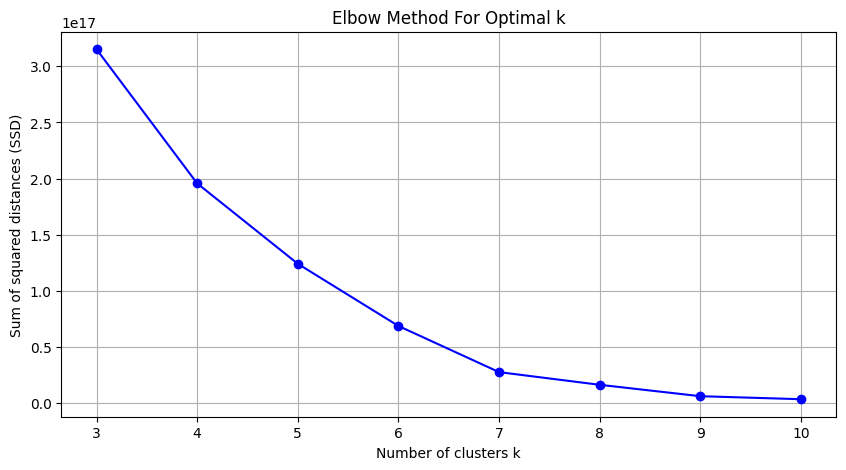

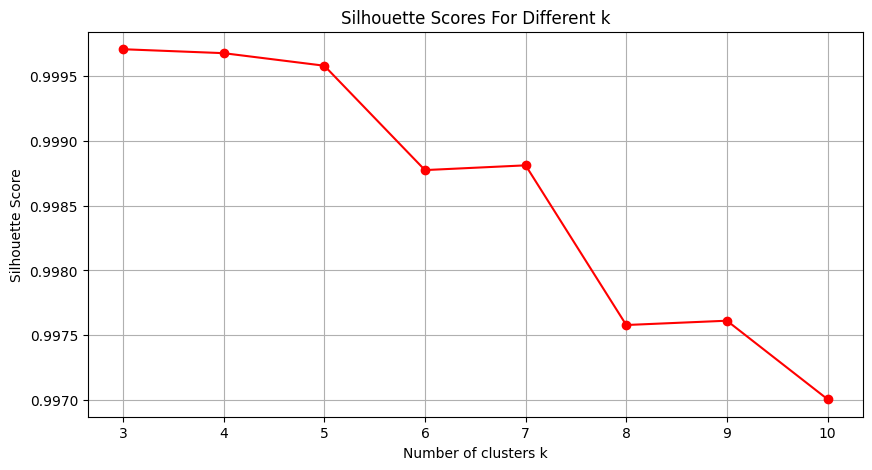

Silhouette Score for k=3: 0.9997
Silhouette Score for k=4: 0.9997
Silhouette Score for k=5: 0.9996
Silhouette Score for k=6: 0.9988
Silhouette Score for k=7: 0.9988
Silhouette Score for k=8: 0.9976
Silhouette Score for k=9: 0.9976
Silhouette Score for k=10: 0.9970


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


df = reduced_df

ssd = []
silhouette_scores = []

# Range of k to try
k_range = range(3, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)
    if k > 1:
        sil_score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None)

plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()


for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")

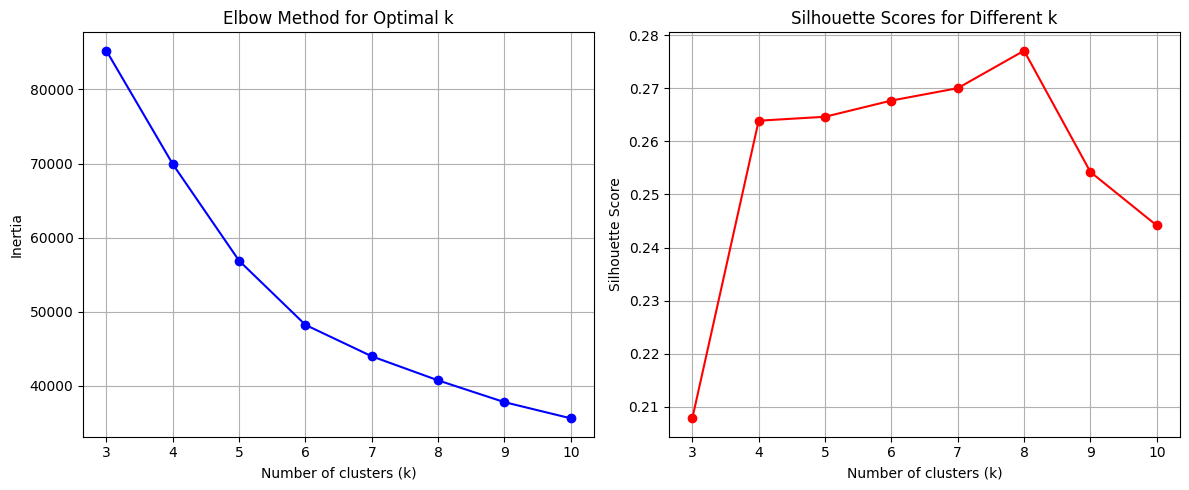

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df is your preprocessed DataFrame
# First, let's standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform SVD
n_components = 5  # As per the previous SVD reduction
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_result = svd.fit_transform(scaled_data)

# Now let's perform k-means clustering on this reduced dataset
k_range = range(3, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(svd_result)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(svd_result, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the silhouette scores
print("Silhouette Scores:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

# Find the k with the highest silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nBest k based on highest silhouette score: {best_k}")

# Print the explained variance ratio of the SVD components
print("\nExplained Variance Ratio of SVD components:")
print(svd.explained_variance_ratio_)
print(f"Total Explained Variance: {sum(svd.explained_variance_ratio_):.4f}")

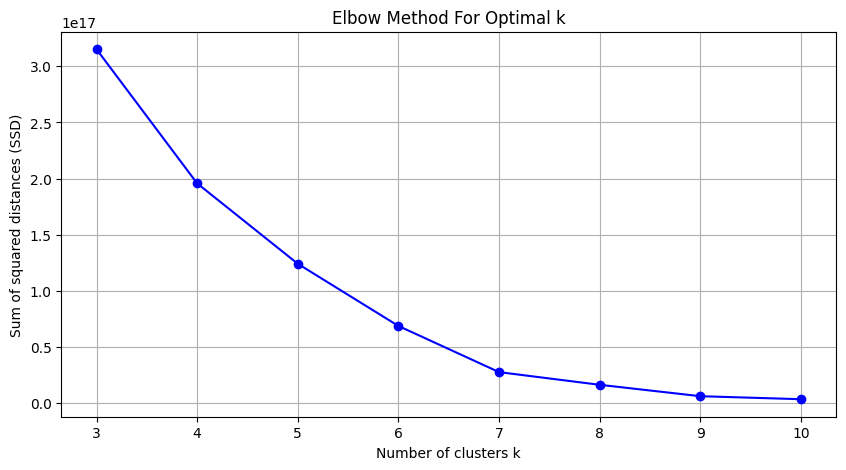

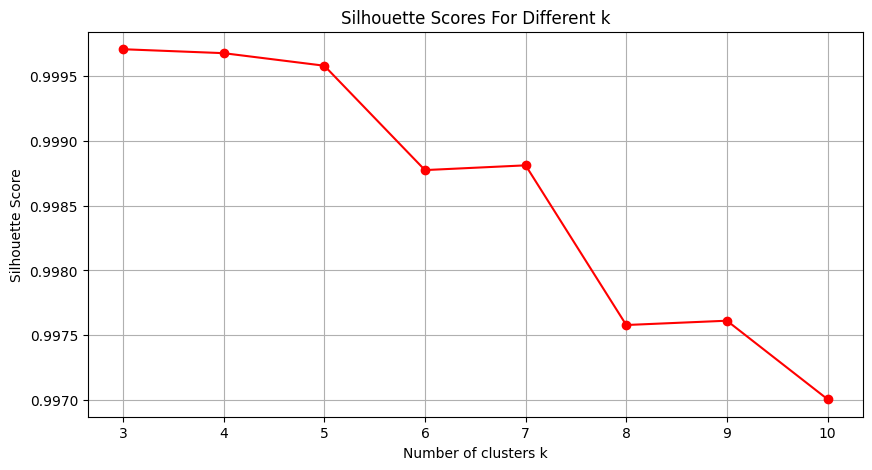

Silhouette Score for k=3: 0.9997
Silhouette Score for k=4: 0.9997
Silhouette Score for k=5: 0.9996
Silhouette Score for k=6: 0.9988
Silhouette Score for k=7: 0.9988
Silhouette Score for k=8: 0.9976
Silhouette Score for k=9: 0.9976
Silhouette Score for k=10: 0.9970


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=5, random_state=42)
svd_reduced = svd.fit_transform(df)

svd_reduced_df = pd.DataFrame(svd_reduced, columns=[f"SVD_Feature_{i}" for i in range(svd_reduced.shape[1])])


ssd = []
silhouette_scores = []

# Range of k to try
k_range = range(3, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(svd_reduced_df)
    ssd.append(kmeans.inertia_)
    if k > 1:
        sil_score = silhouette_score(svd_reduced_df, kmeans.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None)


plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()


for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")


**3.7 Show a drawing of the optimal cluster arrangement for 3.5. Show colab cell code and results.**

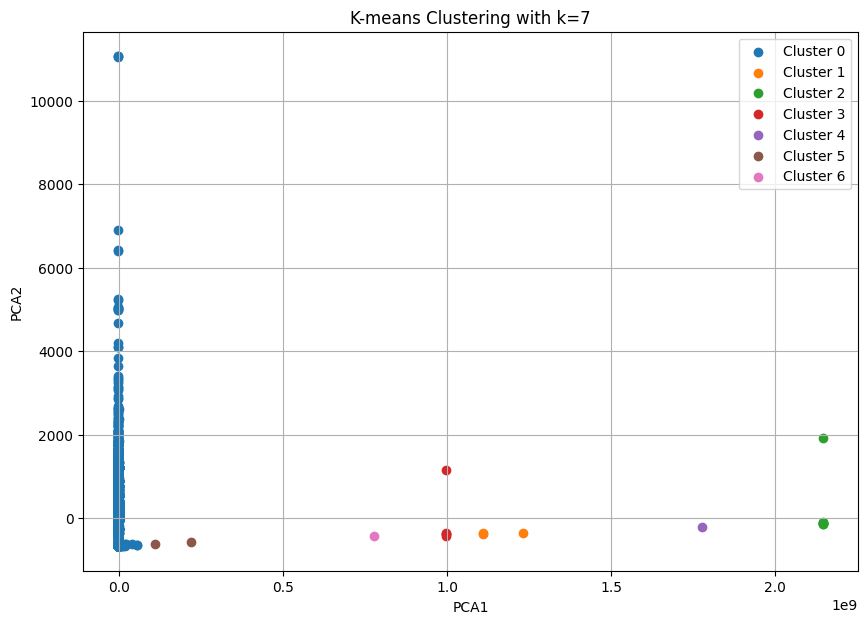

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




optimal_k = 7


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(reduced_df)

reduced_df['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
pca_reduced = pca.fit_transform(reduced_df.drop('Cluster', axis=1))

pca_df = pd.DataFrame(pca_reduced, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = reduced_df['Cluster']

plt.figure(figsize=(10, 7))
for cluster in np.unique(pca_df['Cluster']):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PCA1'], pca_df[pca_df['Cluster'] == cluster]['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()


**3.8 Show a drawing of the optimal cluster arrangement for 3.6. Show colab cell code and results.**

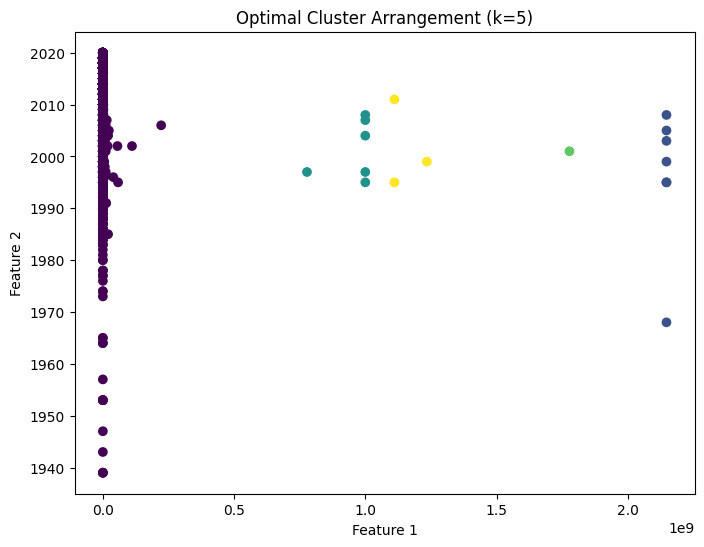

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is the DataFrame and k is the optimal number of clusters
k = 5  # Replace with the optimal k value

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Optimal Cluster Arrangement (k={k})')
plt.show()

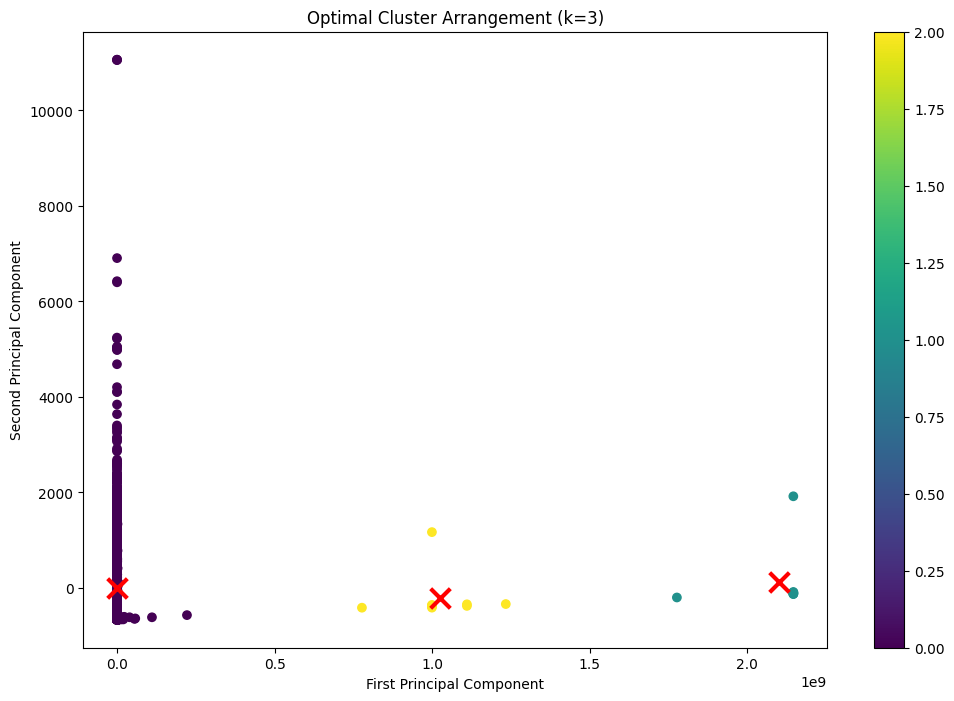

Explained variance ratio of the 2 PCA components:
[1.00000000e+00 1.37611736e-10]
Total explained variance: 1.0000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df is your reduced_df from CUR decomposition

# Find the optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]

# Perform k-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df)

# Reduce to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Plot the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)

# Plot cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)

plt.title(f'Optimal Cluster Arrangement (k={optimal_k})')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Print explained variance ratio of the PCA
print("Explained variance ratio of the 2 PCA components:")
print(pca.explained_variance_ratio_)
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

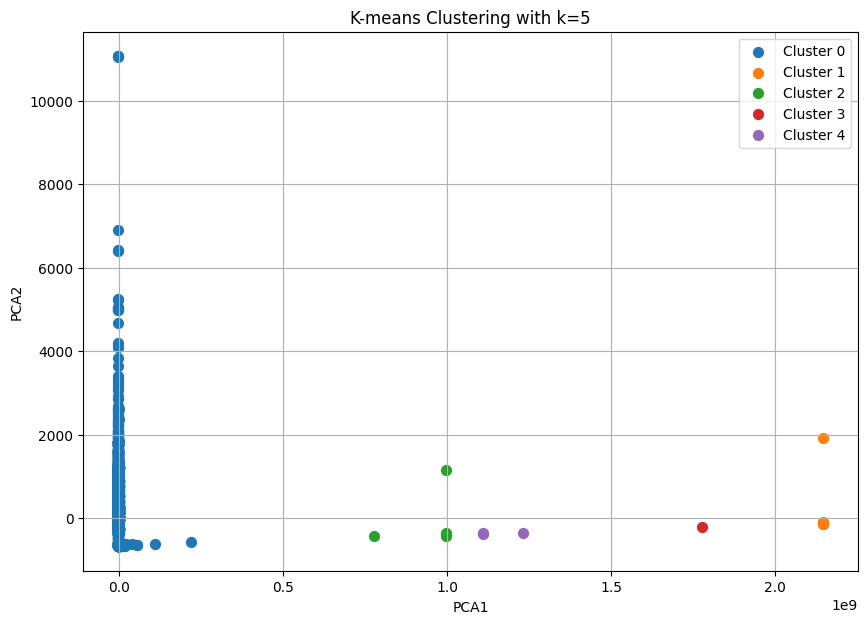

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)


df['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
pca_reduced = pca.fit_transform(df.drop('Cluster', axis=1))


pca_df = pd.DataFrame(pca_reduced, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']


plt.figure(figsize=(10, 7))
for cluster in np.unique(pca_df['Cluster']):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PCA1'], pca_df[pca_df['Cluster'] == cluster]['PCA2'], label=f'Cluster {cluster}', s=50)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

def cur_decomposition(A, k):
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    col_probs = col_squared_norms / col_squared_norms.sum()
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    C = A[:, cols]
    return C, cols

def reconstruction_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed, 'fro') / np.linalg.norm(original, 'fro')

# Original data
data_matrix = df.to_numpy()

# CUR 2 dimensions
C_2, cols_2 = cur_decomposition(data_matrix, 2)
cur_2_error = reconstruction_error(data_matrix, C_2 @ np.linalg.pinv(C_2) @ data_matrix)

# CUR 5 dimensions
C_5, cols_5 = cur_decomposition(data_matrix, 5)
cur_5_error = reconstruction_error(data_matrix, C_5 @ np.linalg.pinv(C_5) @ data_matrix)

# SVD 2 dimensions
svd_2 = TruncatedSVD(n_components=2, random_state=42)
svd_2_result = svd_2.fit_transform(data_matrix)
svd_2_error = reconstruction_error(data_matrix, svd_2_result @ svd_2.components_)

# SVD 5 dimensions
svd_5 = TruncatedSVD(n_components=5, random_state=42)
svd_5_result = svd_5.fit_transform(data_matrix)
svd_5_error = reconstruction_error(data_matrix, svd_5_result @ svd_5.components_)

# Create a table of results
results = pd.DataFrame({
    'Method': ['CUR 2 dimensions', 'CUR 5 dimensions', 'SVD 2 dimensions', 'SVD 5 dimensions'],
    'Reconstruction Error': [cur_2_error, cur_5_error, svd_2_error, svd_5_error]
})

print(results.to_string(index=False))

          Method  Reconstruction Error
CUR 2 dimensions          1.446086e-05
CUR 5 dimensions          1.472436e-07
SVD 2 dimensions          1.366923e-05
SVD 5 dimensions          1.471870e-07


     Component_1  Component_2
0  186005.003473  2648.604369
1  192000.003123  2310.827450
2  200000.002959  2017.750061
3  168966.003098  2266.339149
4   91901.003044  2155.900143


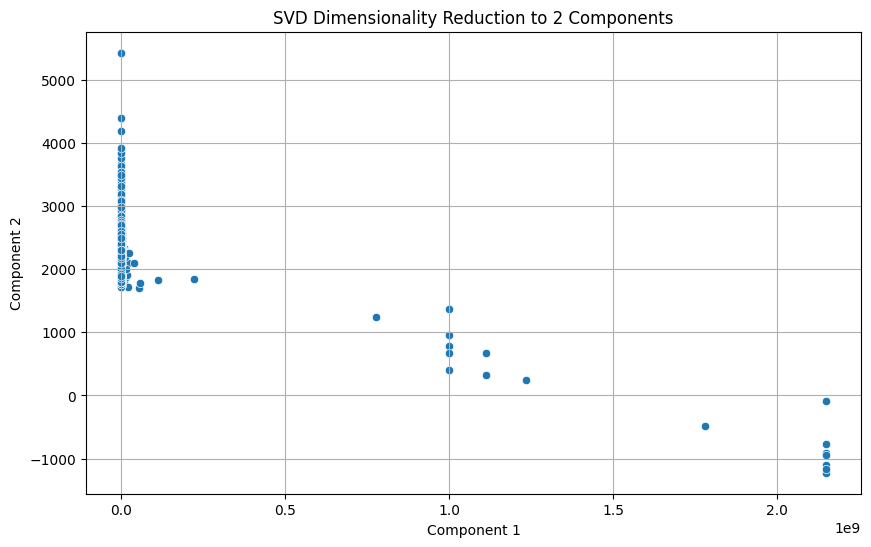

In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.extmath import randomized_svd

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for SVD
data_matrix = car_prices_df.to_numpy()

# Perform SVD
U, S, Vt = randomized_svd(data_matrix, n_components=2, random_state=42)

# Create DataFrame with reduced dimensions
svd_reduced_df = pd.DataFrame(U @ np.diag(S), columns=['Component_1', 'Component_2'])

# Display the first 5 rows of the DataFrame to verify
print(svd_reduced_df.head())

# Plot the reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component_1', y='Component_2', data=svd_reduced_df)
plt.title('SVD Dimensionality Reduction to 2 Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4
0   186005.0     2010.0     1242.0     1399.0       32.0
1   192000.0     2011.0      658.0     1018.0        8.0
2   200000.0     2006.0      684.0        0.0       21.0
3   168966.0     2011.0      661.0      862.0       16.0
4    91901.0     2014.0      684.0      446.0       21.0


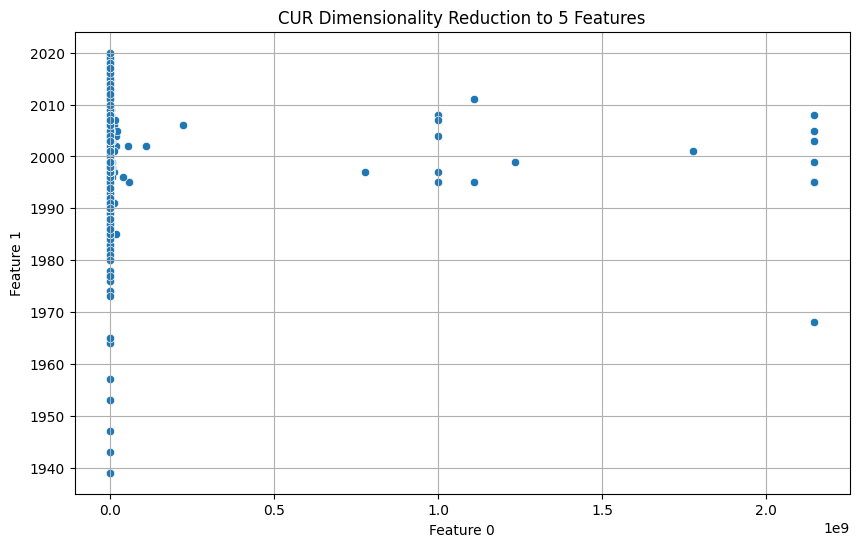

In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for CUR
data_matrix = car_prices_df.to_numpy()

# CUR Decomposition function
def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()

    # Step 2: Randomly select k columns and rows based on their probabilities
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)

    # Step 3: Construct matrices C, U, and R
    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R

# Apply CUR decomposition
num_features = 5  # Reduce to 5 features
C, U, R = cur_decomposition(data_matrix, num_features)

# Create DataFrame with reduced dimensions
reduced_df = pd.DataFrame(C, columns=[f"Feature_{i}" for i in range(C.shape[1])])

# Display the first 5 rows of the DataFrame to verify
print(reduced_df.head())

# Plot the reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_0', y='Feature_1', data=reduced_df)
plt.title('CUR Dimensionality Reduction to 5 Features')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()


     Component_1  Component_2  Component_3  Component_4  Component_5
0  186005.003473  2648.604369   622.186162  -371.057223    -0.986507
1  192000.003123  2310.827450   371.056902   184.834250    24.509488
2  200000.002959  2017.750061  -602.830692   237.144998    13.553177
3  168966.003098  2266.339149   221.769582   194.101088    17.015526
4   91901.003044  2155.900143  -179.776892   206.488994    12.674643


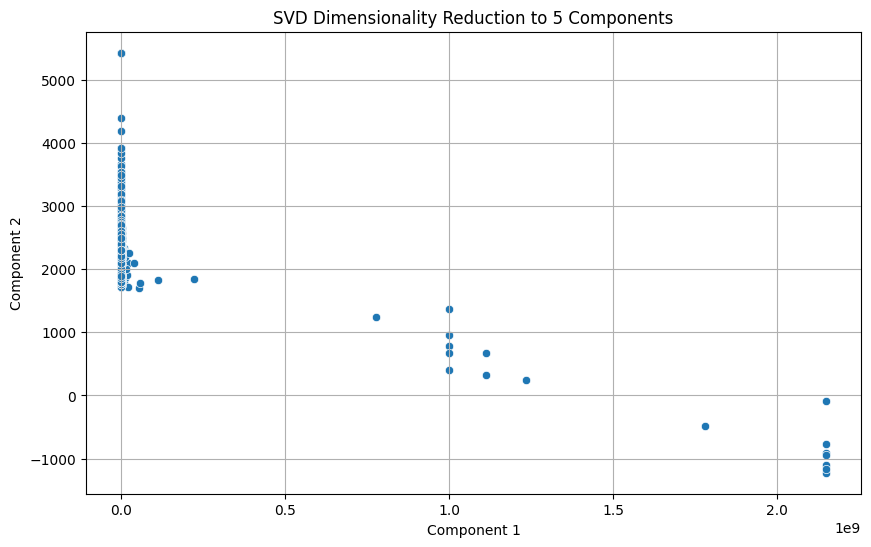

In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.extmath import randomized_svd

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for SVD
data_matrix = car_prices_df.to_numpy()

# Perform SVD
U, S, Vt = randomized_svd(data_matrix, n_components=5, random_state=42)

# Create DataFrame with reduced dimensions
svd_reduced_df = pd.DataFrame(U @ np.diag(S), columns=[f'Component_{i}' for i in range(1, 6)])

# Display the first 5 rows of the DataFrame to verify
print(svd_reduced_df.head())

# Plot the reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component_1', y='Component_2', data=svd_reduced_df)
plt.title('SVD Dimensionality Reduction to 5 Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

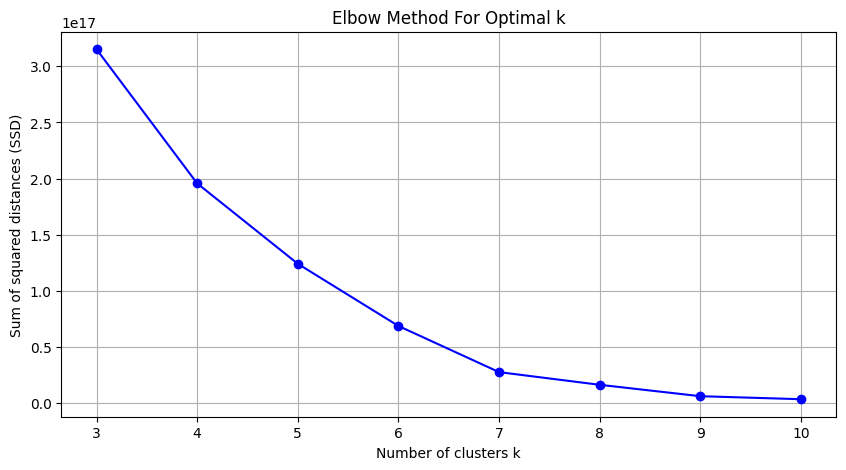

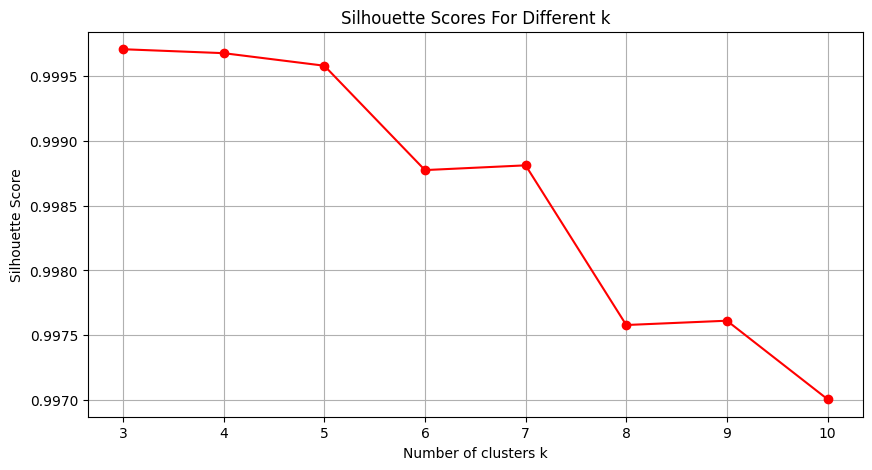

Silhouette Score for k=3: 0.9997
Silhouette Score for k=4: 0.9997
Silhouette Score for k=5: 0.9996
Silhouette Score for k=6: 0.9988
Silhouette Score for k=7: 0.9988
Silhouette Score for k=8: 0.9976
Silhouette Score for k=9: 0.9976
Silhouette Score for k=10: 0.9970


In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for CUR
data_matrix = car_prices_df.to_numpy()

# CUR Decomposition function
def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()

    # Step 2: Randomly select k columns and rows based on their probabilities
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)

    # Step 3: Construct matrices C, U, and R
    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R

# Apply CUR decomposition
num_features = 5  # Reduce to 5 features
C, U, R = cur_decomposition(data_matrix, num_features)

# Create DataFrame with reduced dimensions
reduced_df = pd.DataFrame(C, columns=[f"Feature_{i}" for i in range(C.shape[1])])

# Variables to store results
ssd = []  # Sum of squared distances
silhouette_scores = []

# Range of k to try
k_range = range(3, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_df)
    ssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

    # Compute the silhouette score
    sil_score = silhouette_score(reduced_df, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plotting the Elbow Method graph for SSD
plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()

# Displaying the silhouette scores for review
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")


     Component_1  Component_2  Component_3  Component_4  Component_5
0  186005.003473  2648.604369   622.186162  -371.057223    -0.986507
1  192000.003123  2310.827450   371.056902   184.834250    24.509488
2  200000.002959  2017.750061  -602.830692   237.144998    13.553177
3  168966.003098  2266.339149   221.769582   194.101088    17.015526
4   91901.003044  2155.900143  -179.776892   206.488994    12.674643


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

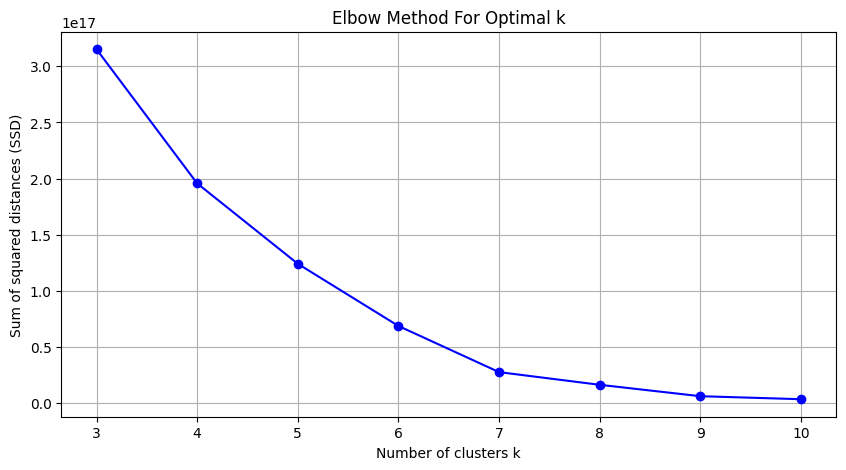

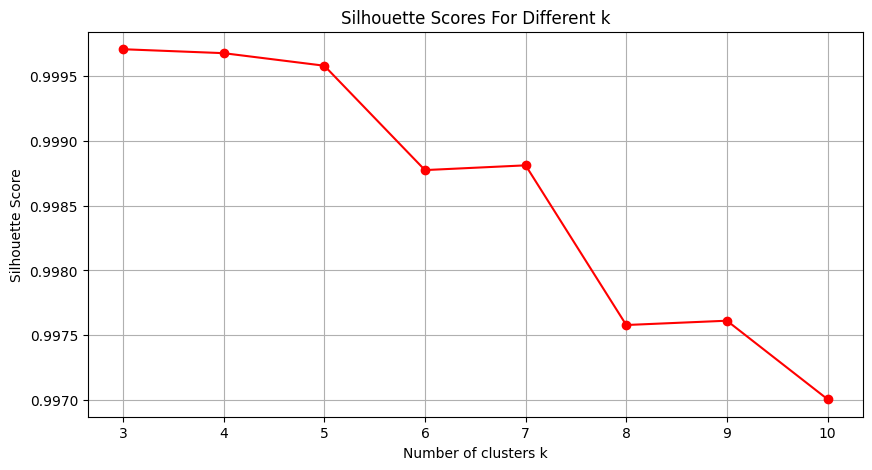

Silhouette Score for k=3: 0.9997
Silhouette Score for k=4: 0.9997
Silhouette Score for k=5: 0.9996
Silhouette Score for k=6: 0.9988
Silhouette Score for k=7: 0.9988
Silhouette Score for k=8: 0.9976
Silhouette Score for k=9: 0.9976
Silhouette Score for k=10: 0.9970


In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.extmath import randomized_svd

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for SVD
data_matrix = car_prices_df.to_numpy()

# Perform SVD
U, S, Vt = randomized_svd(data_matrix, n_components=5, random_state=42)

# Create DataFrame with reduced dimensions
svd_reduced_df = pd.DataFrame(U @ np.diag(S), columns=[f'Component_{i}' for i in range(1, 6)])

# Display the first 5 rows of the DataFrame to verify
print(svd_reduced_df.head())

# Perform k-means clustering for k values from 3 to 10
ssd = []  # Sum of squared distances
silhouette_scores = []

k_range = range(3, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(svd_reduced_df)
    ssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

    # Compute the silhouette score
    sil_score = silhouette_score(svd_reduced_df, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plotting the Elbow Method graph for SSD
plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()

# Displaying the silhouette scores for review
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


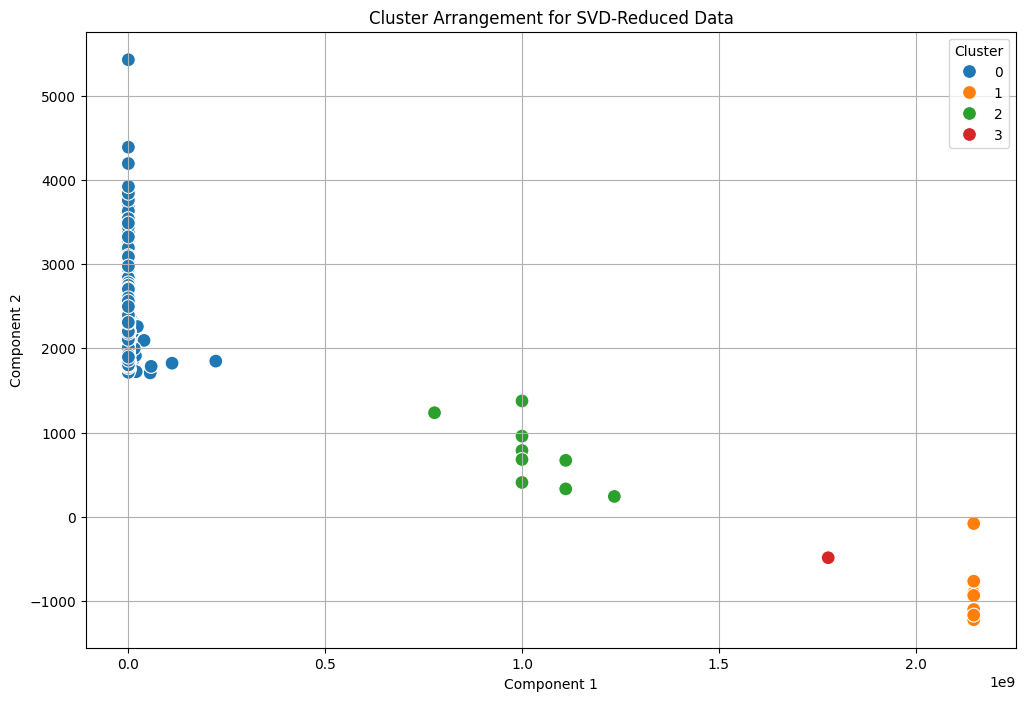

In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.extmath import randomized_svd

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for SVD
data_matrix = car_prices_df.to_numpy()

# Perform SVD
U, S, Vt = randomized_svd(data_matrix, n_components=5, random_state=42)

# Create DataFrame with reduced dimensions
svd_reduced_df = pd.DataFrame(U @ np.diag(S), columns=[f'Component_{i}' for i in range(1, 6)])

# Determine optimal number of clusters
k = 4  # Assume the optimal number determined from previous analysis

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(svd_reduced_df)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
svd_reduced_df['Cluster'] = labels

# Plot the cluster arrangement
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component_1', y='Component_2', hue='Cluster', palette='tab10', data=svd_reduced_df, s=100)
plt.title('Cluster Arrangement for SVD-Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


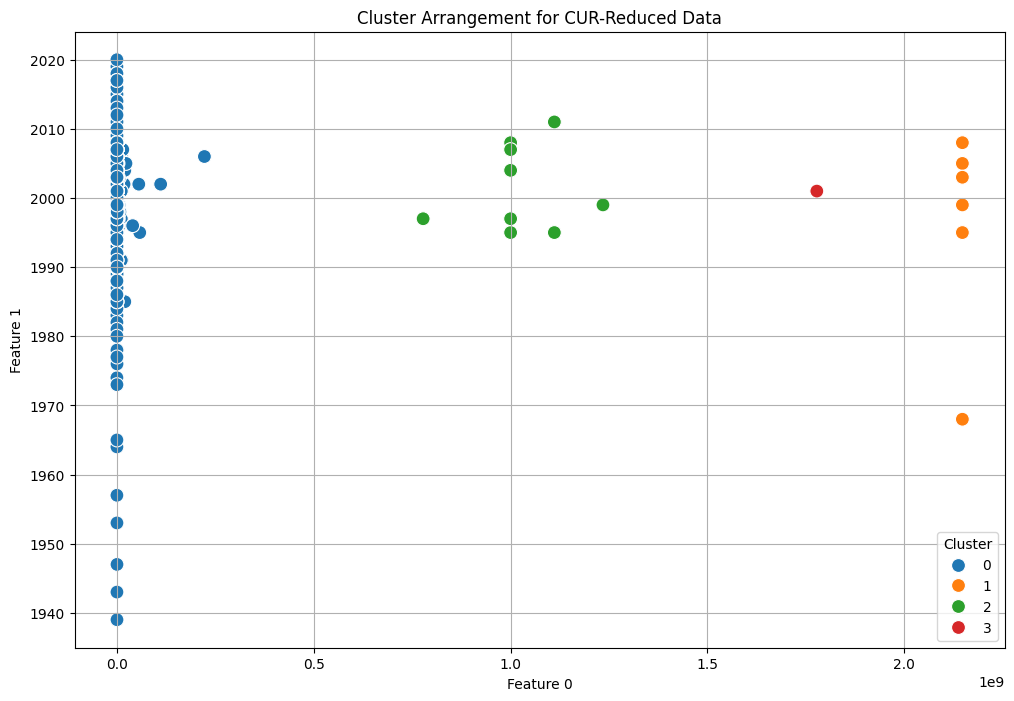

In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for CUR
data_matrix = car_prices_df.to_numpy()

# CUR Decomposition function
def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()

    # Step 2: Randomly select k columns and rows based on their probabilities
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)

    # Step 3: Construct matrices C, U, and R
    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R

# Apply CUR decomposition
num_features = 5  # Reduce to 5 features
C, U, R = cur_decomposition(data_matrix, num_features)

# Create DataFrame with reduced dimensions
reduced_df = pd.DataFrame(C, columns=[f"Feature_{i}" for i in range(C.shape[1])])

# Determine optimal number of clusters
k = 4  # Assume the optimal number determined from previous analysis

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reduced_df)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
reduced_df['Cluster'] = labels

# Plot the cluster arrangement
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Feature_0', y='Feature_1', hue='Cluster', palette='tab10', data=reduced_df, s=100)
plt.title('Cluster Arrangement for CUR-Reduced Data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Install necessary packages
!pip install cur

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.extmath import randomized_svd
from cur import cur

# Load and preprocess the car prices data
car_prices_df = pd.read_csv('https://gist.githubusercontent.com/palles77/38bd063939c1ac08b8d1e4f7c2c26abc/raw/b01ca987613684082b3897dd24e2f00909da6bd9/car_prices.csv')
car_prices_df = car_prices_df.drop(['ID', 'Price', 'Doors'], axis=1)
car_prices_df['Levy'] = car_prices_df['Levy'].replace('-', '0').astype(int)
car_prices_df['Mileage'] = car_prices_df['Mileage'].str.replace(' km', '').astype(int)

categorical_columns = ['Leather interior', 'Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoder = LabelEncoder()

for column in categorical_columns:
    car_prices_df[column] = car_prices_df[column].fillna('Missing')
    car_prices_df[column] = label_encoder.fit_transform(car_prices_df[column])

car_prices_df.fillna(0, inplace=True)

# Convert entire DataFrame to numeric to ensure all data is numeric
car_prices_df = car_prices_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert DataFrame to numpy array for dimensionality reduction
data_matrix = car_prices_df.to_numpy()

# 1. CUR Dimensionality Reduction
def cur_decomposition(A, k):
    # Step 1: Compute probabilities
    row_squared_norms = np.linalg.norm(A, axis=1)**2
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    row_probs = row_squared_norms / row_squared_norms.sum()
    col_probs = col_squared_norms / col_squared_norms.sum()

    # Step 2: Randomly select k columns and rows based on their probabilities
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    rows = np.random.choice(a=np.arange(A.shape[0]), size=k, replace=False, p=row_probs)

    # Step 3: Construct matrices C, U, and R
    C = A[:, cols]
    R = A[rows, :]
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)

    return C, U, R

num_features = 5  # Reduce to 5 features for consistency
C, U, R = cur_decomposition(data_matrix, num_features)
CUR_reconstructed = C @ U @ R
CUR_error = np.linalg.norm(data_matrix - CUR_reconstructed, 'fro')

# 2. SVD Dimensionality Reduction
U, S, Vt = randomized_svd(data_matrix, n_components=num_features, random_state=42)
SVD_reconstructed = U @ np.diag(S) @ Vt
SVD_error = np.linalg.norm(data_matrix - SVD_reconstructed, 'fro')

# Display errors in a DataFrame
errors_df = pd.DataFrame({
    'Method': ['CUR', 'SVD'],
    'Reconstruction Error': [CUR_error, SVD_error]
})

print(errors_df)


  Method  Reconstruction Error
0    CUR           4794.195845
1    SVD           1077.143975


In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

def cur_decomposition(A, k):
    col_squared_norms = np.linalg.norm(A, axis=0)**2
    col_probs = col_squared_norms / col_squared_norms.sum()
    cols = np.random.choice(a=np.arange(A.shape[1]), size=k, replace=False, p=col_probs)
    C = A[:, cols]
    return C, cols

def reconstruction_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed, 'fro') / np.linalg.norm(original, 'fro')

# Original data
data_matrix = df.to_numpy()

# CUR 2 dimensions
C_2, cols_2 = cur_decomposition(data_matrix, 2)
cur_2_error = reconstruction_error(data_matrix, C_2 @ np.linalg.pinv(C_2) @ data_matrix)

# CUR 5 dimensions
C_5, cols_5 = cur_decomposition(data_matrix, 5)
cur_5_error = reconstruction_error(data_matrix, C_5 @ np.linalg.pinv(C_5) @ data_matrix)

# SVD 2 dimensions
svd_2 = TruncatedSVD(n_components=2, random_state=42)
svd_2_result = svd_2.fit_transform(data_matrix)
svd_2_error = reconstruction_error(data_matrix, svd_2_result @ svd_2.components_)

# SVD 5 dimensions
svd_5 = TruncatedSVD(n_components=5, random_state=42)
svd_5_result = svd_5.fit_transform(data_matrix)
svd_5_error = reconstruction_error(data_matrix, svd_5_result @ svd_5.components_)

# Create a table of results
results = pd.DataFrame({
    'Method': ['CUR 2 dimensions', 'CUR 5 dimensions', 'SVD 2 dimensions', 'SVD 5 dimensions'],
    'Reconstruction Error': [cur_2_error, cur_5_error, svd_2_error, svd_5_error]
})

print(results.to_string(index=False))

          Method  Reconstruction Error
CUR 2 dimensions          3.124617e-05
CUR 5 dimensions          1.604199e-07
SVD 2 dimensions          1.366940e-05
SVD 5 dimensions          1.603684e-07
